In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import dataset
titanic = pd.read_csv(r"C:\Users\noufi\Downloads\Titanic-Dataset.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Age is a numerical variable. So we can replace it with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\noufi\AppData\Local\Temp\ipykernel_9728\1518436158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [7]:
# Cabin has many null values so we can drop this
titanic.drop('Cabin',axis=1,inplace=True)

In [8]:
#Embarked is categorical.Only 2 missing values. 
titanic.fillna(titanic['Embarked'].mode()[0],inplace=True)

In [9]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
# Summary statistics for numeric columns
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print(titanic.duplicated().sum())

0


In [12]:
#Drop the unnecessary variables
titanic = titanic.drop(['PassengerId','Name','Ticket'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
titanic.shape

(891, 8)

In [14]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
titanic['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [17]:
num_cols = titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']]

In [19]:
#correlation matrix
corr = num_cols.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


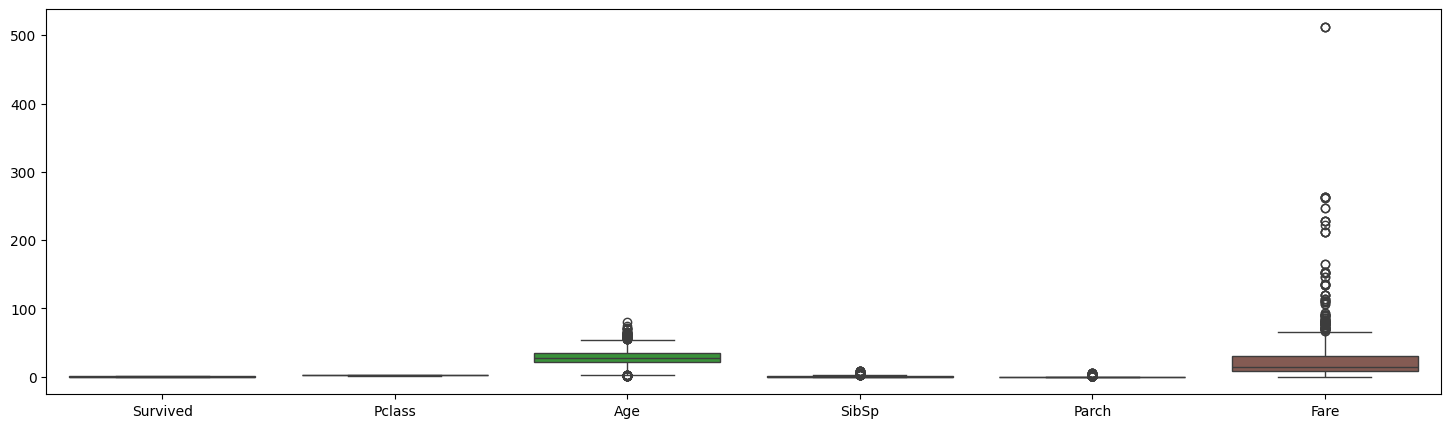

In [20]:
#boxplot of Titanic dataset
plt.figure(figsize=(18,5))
sns.boxplot(data=num_cols)
plt.show()

In [21]:
#outliers
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = titanic[(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]
outliers[['Fare']].shape[0]

116

In [22]:
outliers[['Fare']].sort_values('Fare')

,Fare
151,66.6000
336,66.6000
369,69.3000
641,69.3000
201,69.5500
...,...
341,263.0000
438,263.0000
258,512.3292
679,512.3292


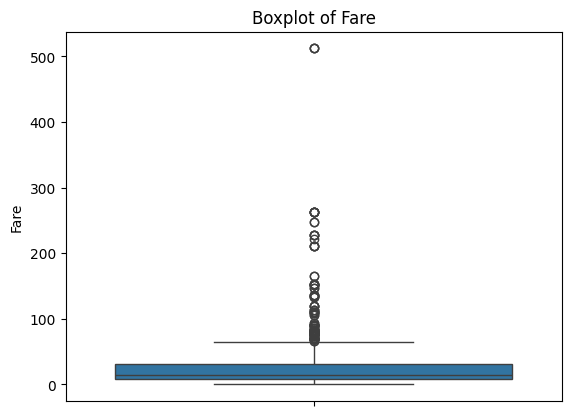

In [23]:
sns.boxplot(y='Fare', data=titanic)
plt.title('Boxplot of Fare')
plt.show()

In [24]:
Q1_age = titanic['Age'].quantile(0.25)
Q3_age = titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
outliers_age = titanic[(titanic['Age'] < lower_bound_age) | (titanic['Age'] > upper_bound_age)]
outliers_age[['Age']].shape[0]

66

In [25]:
outliers_age[['Age']].sort_values('Age')

,Age
803,0.42
755,0.67
644,0.75
469,0.75
78,0.83
...,...
116,70.50
493,71.00
96,71.00
851,74.00


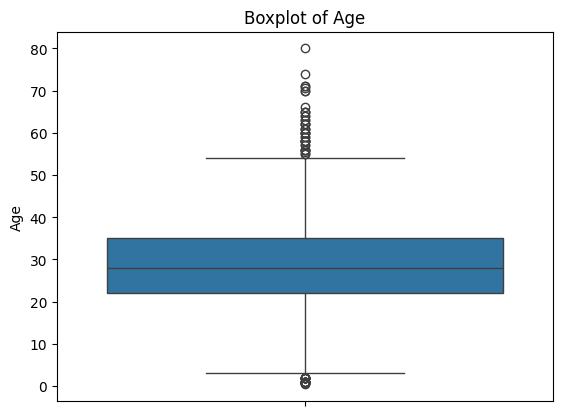

In [26]:
sns.boxplot(y='Age', data=titanic)
plt.title('Boxplot of Age')
plt.show()

In [27]:
Q1_s = titanic['SibSp'].quantile(0.25)
Q3_s = titanic['SibSp'].quantile(0.75)
IQR_s = Q3_s - Q1_s
lower_bound_s = Q1_s - 1.5 * IQR_s
upper_bound_s = Q3_s + 1.5 * IQR_s
outliers_s = titanic[(titanic['SibSp'] < lower_bound_s) | (titanic['SibSp'] > upper_bound_s)]
outliers_s[['SibSp']].shape[0]

46

In [28]:
outliers_s[['SibSp']].sort_values('SibSp')

,SibSp
7,3
24,3
27,3
63,3
88,3
176,3
85,3
229,3
341,3
374,3


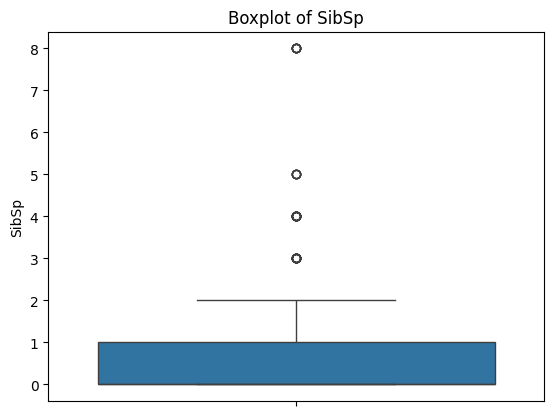

In [29]:
sns.boxplot(y='SibSp', data=titanic)
plt.title('Boxplot of SibSp')
plt.show()

In [30]:
Q1_p = titanic['Parch'].quantile(0.25)
Q3_p = titanic['Parch'].quantile(0.75)
IQR_p = Q3_p - Q1_p
lower_bound_p = Q1_p - 1.5 * IQR_p
upper_bound_p = Q3_p + 1.5 * IQR_p
outliers_p = titanic[(titanic['Parch'] < lower_bound_p) | (titanic['Parch'] > upper_bound_p)]
outliers_p[['Parch']].shape[0]

213

In [31]:
outliers_p[['Parch']].sort_values('Parch')

,Parch
7,1
10,1
24,1
16,1
54,1
...,...
25,5
885,5
610,5
638,5


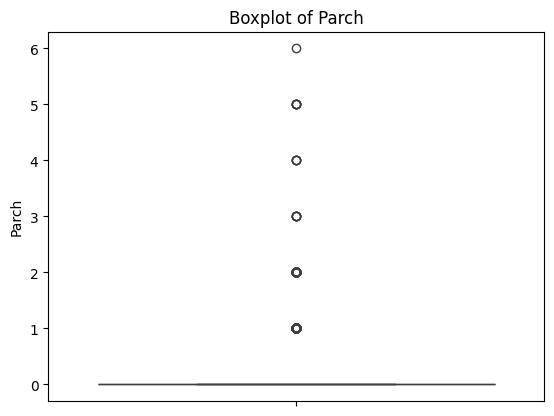

In [32]:
sns.boxplot(y='Parch', data=titanic)
plt.title('Boxplot of Parch')
plt.show()

In [33]:
# Age, Fare, Parch and Sibsp has outliers but we do not remove them. Because, 
# Fare can vary a lot (1st class vs 3rd class). High fares are realistic, not errors.
# Ages above 70 or below 1 could be rare but valid.
# SibSp Large families exist, though rare.
# Parch Higher values are uncommon but may not be errors.

In [34]:
# Count of Survival(1) and non-survival(0)
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

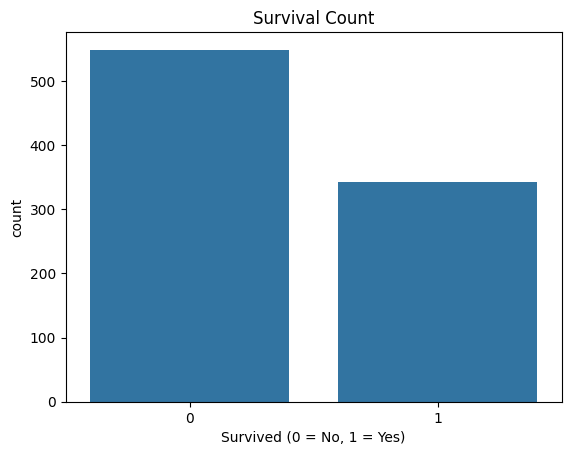

In [35]:
sns.countplot(x='Survived',data = titanic)
plt.title("Survival Count")
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.show()

In [36]:
print("Survived(1) and non-Survived(0) by Sex")
print(titanic.groupby('Sex')['Survived'].value_counts())

Survived(1) and non-Survived(0) by Sex
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


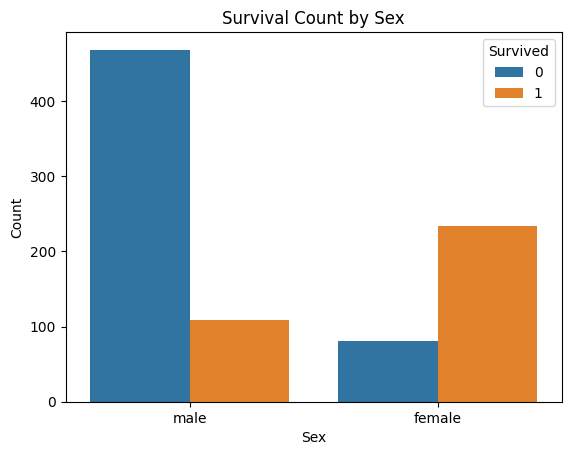

In [37]:
sns.countplot(x='Sex', hue='Survived', data=titanic)
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()


In [38]:
print("Survived and non-Survived by Pclass")
print(titanic.groupby('Pclass')['Survived'].value_counts())

Survived and non-Survived by Pclass
Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


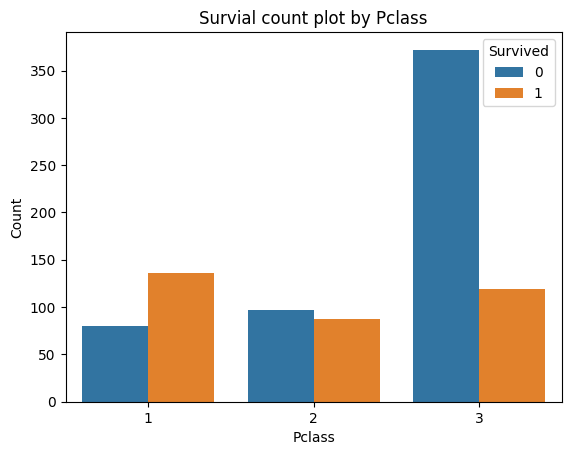

In [39]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)
plt.title('Survial count plot by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

In [40]:
print("Survived and non-Survived by Embarked")
print(titanic.groupby('Embarked')['Survived'].value_counts())

Survived and non-Survived by Embarked
Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64


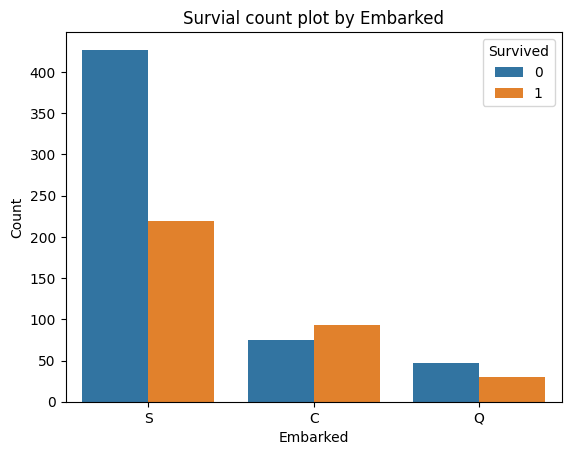

In [41]:
sns.countplot(x='Embarked', hue='Survived', data=titanic)
plt.title('Survial count plot by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

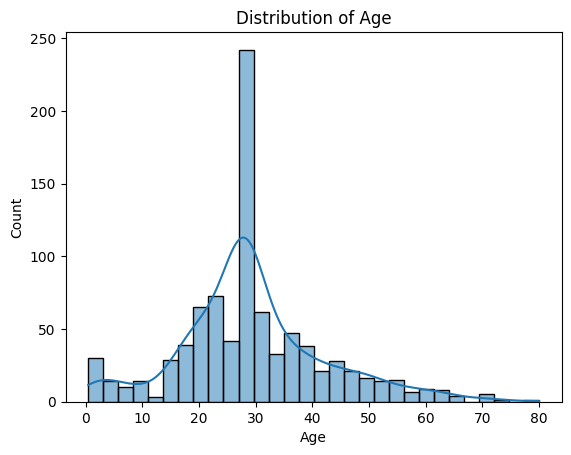

In [42]:
sns.histplot(titanic['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()


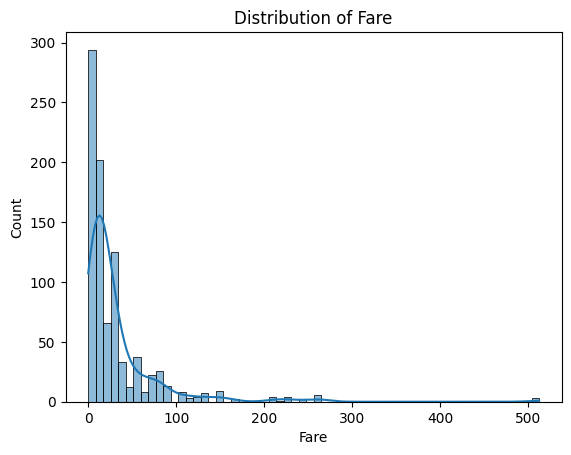

In [43]:
sns.histplot(titanic['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.show()

In [44]:
# Age & Fare is right skewed.

In [45]:
titanic['fare_bin'] = pd.cut(titanic['Fare'], bins=[0, 50, 100, 150, 600], 
                             labels=['0-50', '50-100', '100-150', '150+'])

# Group by fare bins and survival
fare_survival = titanic.groupby('fare_bin')['Survived'].value_counts().unstack()
print("Survived and Non-Survived by Fare Bin")
print(fare_survival)

Survived and Non-Survived by Fare Bin
Survived    0    1
fare_bin          
0-50      484  232
50-100     37   70
100-150     5   19
150+        9   20


C:\Users\noufi\AppData\Local\Temp\ipykernel_9728\4123021378.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = titanic.groupby('fare_bin')['Survived'].value_counts().unstack()


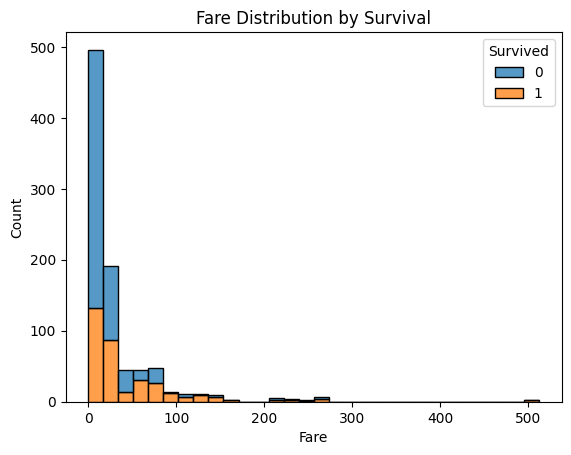

In [46]:
sns.histplot(data=titanic, x='Fare', hue='Survived', bins=30, multiple='stack')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


<Axes: >

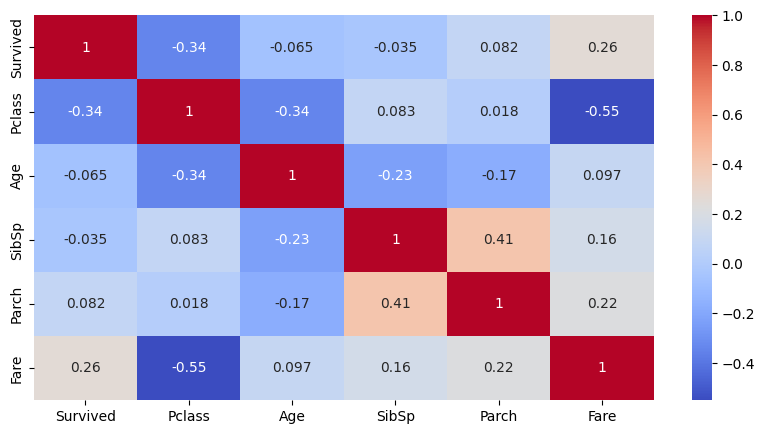

In [47]:
# Correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')

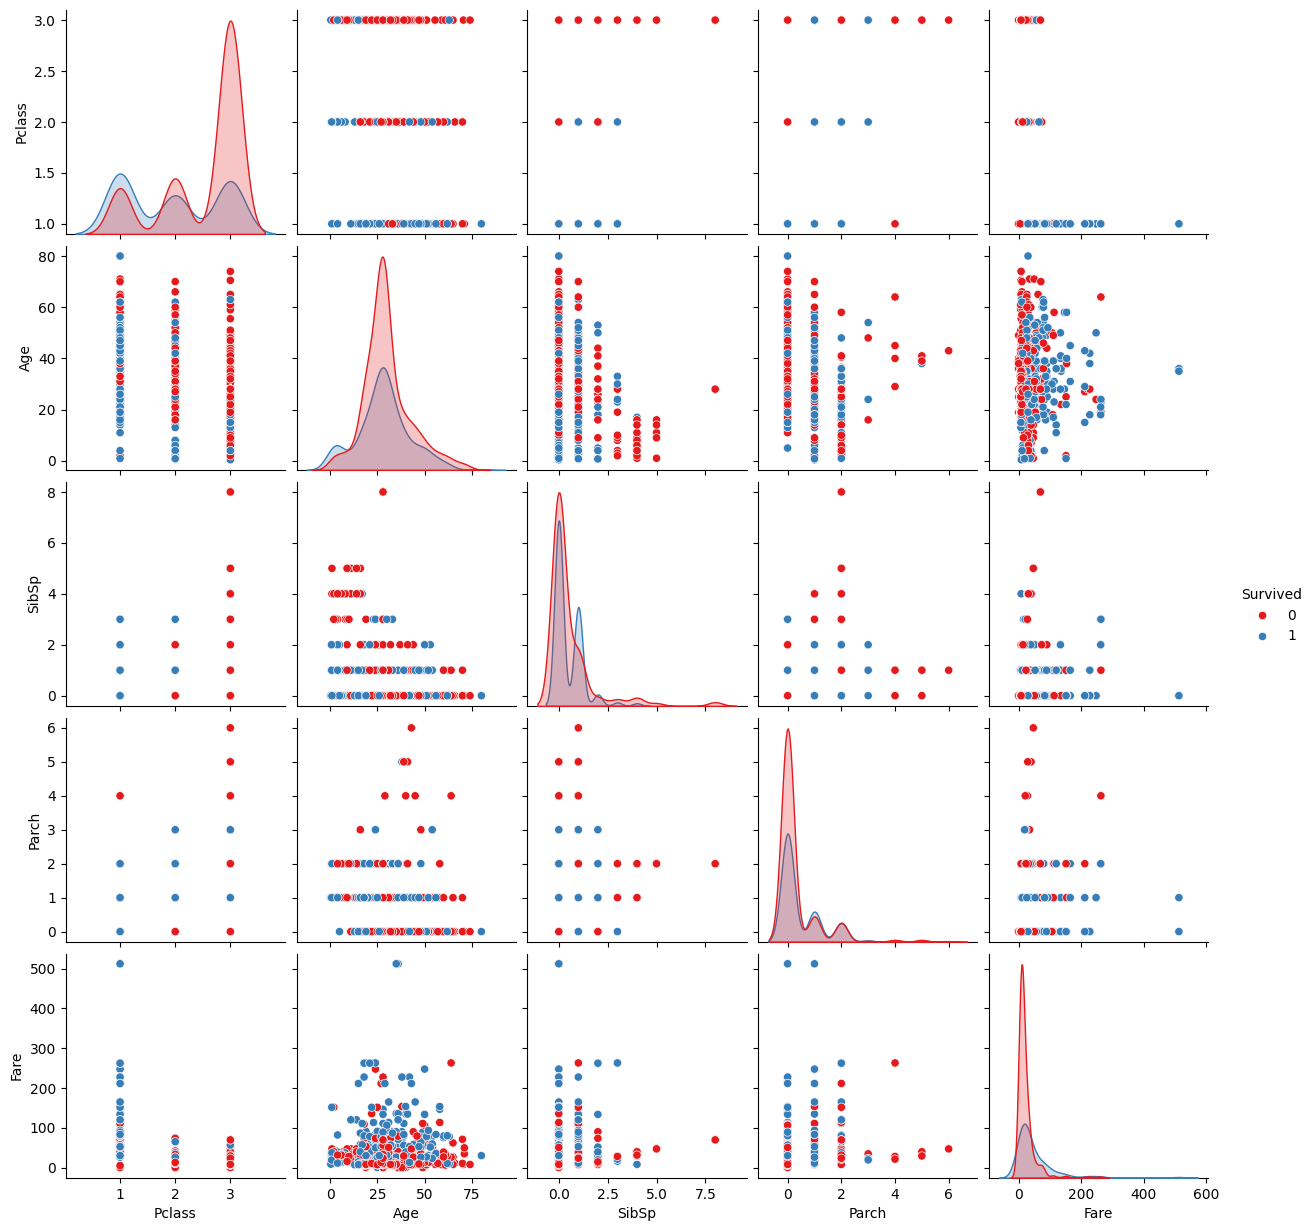

In [48]:
# Pairplot 
sns.pairplot(titanic, hue='Survived', diag_kind='kde', palette='Set1')
plt.show()